In [1]:
from ApertureClass import AperturePhotometry
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import numpy as np
import pickle

%matplotlib widget

In [2]:
target = AperturePhotometry()
target.aperture_photometry(69, 75, 13, 20)

In [3]:
ref01 = AperturePhotometry()
ref01.aperture_photometry(207, 32, 13, 20)

In [4]:
ref02 = AperturePhotometry()
ref02.aperture_photometry(453, 95, 13, 20)

In [5]:
differential_ref01 = target.photometry/ref01.photometry
differential_ref02 = target.photometry/ref02.photometry
differential_allref = target.photometry/(ref01.photometry + ref02.photometry)

median_bjd = np.median(target.bjd)

time_offset = 2459990
time_ingr = time_offset + 0.59
time_egr = time_offset + 0.69

out_transit_selection = (target.bjd < time_ingr) | (target.bjd > time_egr) 

from numpy.polynomial import Polynomial
poly_ref01_pfit = Polynomial.fit(target.bjd[out_transit_selection] - median_bjd, differential_ref01[out_transit_selection], deg = 2)
poly_ref02_pfit = Polynomial.fit(target.bjd[out_transit_selection] - median_bjd, differential_ref02[out_transit_selection], deg = 2)
poly_allref_pfit = Polynomial.fit(target.bjd[out_transit_selection] - median_bjd, differential_allref[out_transit_selection], deg = 2)

In [6]:
normalized_diff_ref01_photometry = differential_ref01 / poly_ref01_pfit(target.bjd - median_bjd)
normalized_diff_ref02_photometry = differential_ref02 / poly_ref02_pfit(target.bjd - median_bjd)
normalized_diff_allref_photometry = differential_allref / poly_allref_pfit(target.bjd - median_bjd)

norm_ref01_std = np.std(normalized_diff_ref01_photometry[out_transit_selection])
norm_ref02_std = np.std(normalized_diff_ref02_photometry[out_transit_selection])
norm_allref_std = np.std(normalized_diff_allref_photometry[out_transit_selection])

print(f'STD Ref#1 {norm_ref01_std:.4f}')
print(f'STD Ref#2 {norm_ref02_std:.4f}')
print(f'STD All ref {norm_allref_std:.4f}')
print()
print(f'Mean aperture Target {np.mean(target.aperture):.2f}')
print(f'Mean aperture Ref #1 {np.mean(ref01.aperture):.2f}')
print(f'Mean aperture Ref #2 {np.mean(ref02.aperture):.2f}')

STD Ref#1 0.0029
STD Ref#2 0.0028
STD All ref 0.0023

Mean aperture Target 8.73
Mean aperture Ref #1 8.82
Mean aperture Ref #2 8.74


In [7]:
differential_ref01_error = np.sqrt((target.photometry_error**2/ref01.photometry**2) + ref01.photometry_error**2 * (target.photometry/ref01.photometry**2)**2)

differential_allref_error = np.sqrt((target.photometry_error**2/(ref01.photometry + ref02.photometry)**2) + 
                                    (((ref01.photometry_error)**2)*(target.photometry/(ref01.photometry + ref02.photometry)**2)**2) +
                                    (((ref02.photometry_error)**2)*(target.photometry/(ref01.photometry + ref02.photometry)**2)**2))

print(target.photometry_error/target.photometry *100)
#print(differential_allref_error)

[0.09838952 0.09833823 0.09834888 0.09795523 0.09840148 0.09877309
 0.09767612 0.09840689 0.09808895 0.09804752 0.09862293 0.09830037
 0.09814342 0.09805513 0.09867867 0.09791713 0.09779535 0.09779046
 0.09839258 0.09814391 0.09792525 0.09761655 0.09772256 0.09803551
 0.09821273 0.09846061 0.09802333 0.09846897 0.0982007  0.09882417
 0.0984864  0.09820408 0.0980998  0.09815013 0.09815545 0.09782585
 0.09790237 0.09775419 0.09805256 0.09740702 0.09774174 0.09774109
 0.09786995 0.09777302 0.09751229 0.09772927 0.09779299 0.09788361
 0.09776293 0.09813327 0.09784122 0.09785518 0.09776002 0.09782438
 0.09818831 0.09878647 0.097254   0.09790941 0.098212   0.09761584
 0.0980969  0.09782113 0.09744519 0.09769734 0.09785681 0.09781285
 0.09764695 0.09731189 0.09730033 0.0975237  0.09748768 0.09797101
 0.09788052 0.09766256 0.0974194  0.09735241 0.09720744 0.09785139
 0.09741089 0.09797583 0.09772762 0.09746402 0.09784934 0.09746054
 0.09742045 0.09711977 0.09794418 0.09763983 0.09739352 0.0974

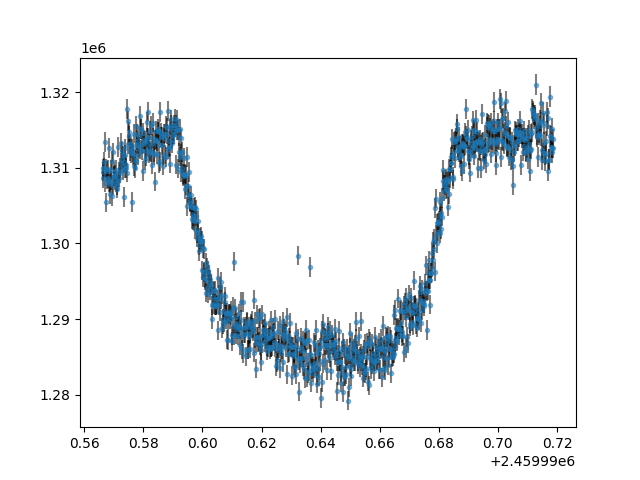

In [8]:
plt.figure()
plt.errorbar(target.bjd, target.photometry, yerr=target.photometry_error, fmt='.', ecolor='k', alpha=0.5)
plt.show()

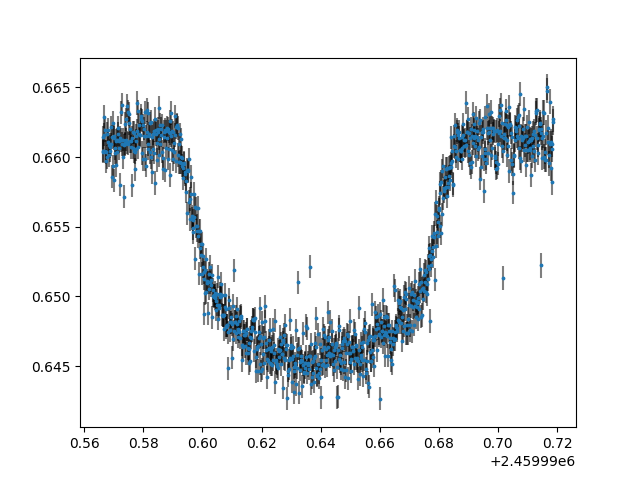

In [9]:
plt.figure()
plt.scatter(target.bjd, differential_allref, s=3)
plt.errorbar(target.bjd, differential_allref, fmt=' ', yerr=differential_allref_error, alpha=0.5, ecolor='k', zorder=-1)
plt.show()

In [10]:
bjd_bin = np.empty(41)
diff_bin = np.empty(41)

bjd = target.bjd - time_offset

for i in range(23, 944, 23):
    j = int(i/23) - 1
    k = i - 23
    bjd_bin[j] = np.median(bjd[k:i])
    diff_bin[j] = np.mean(differential_allref[k:i])


In [11]:
def make_big_circle_around_star(x_pos,y_pos,color='w',label=''):
    from matplotlib.patches import Circle
    radii=[9,15]
    n=50 #our linspace length
    theta=np.linspace(0,2*np.pi,n)
    xs=np.outer(radii,np.cos(theta))#makes x coord of inner circle, then outer circle 
    ys=np.outer(radii,np.sin(theta))#makes y coord of inner circle, then outer circle
    xs[1,:]=xs[1,::-1]
    ys[1,:]=ys[1,::-1]
    
    ax[0].fill(np.ravel(xs)+x_pos,np.ravel(ys)+y_pos,
            edgecolor=None,facecolor=color,
           alpha=0.75,
           label=label) #filling up the circle, alpha is transparency
    
def make_circle_around_star(x_pos,y_pos,radius, color='w',label='',thickness=0.75, alpha=1.): #we add radius, thickness and alpha term to our old function
    #from matplotlib.patches import Circle
    radii=[radius,radius+thickness]
    n=50 #our linspace length
    theta=np.linspace(0,2*np.pi,n)
    xs=np.outer(radii,np.cos(theta))#makes x coord of inner circle, then outer circle 
    ys=np.outer(radii,np.sin(theta))#makes y coord of inner circle, then outer circle
    xs[1,:]=xs[1,::-1]
    ys[1,:]=ys[1,::-1]
    
    ax[1].fill(np.ravel(xs)+x_pos,np.ravel(ys)+y_pos,
            edgecolor=None,facecolor=color,
           alpha=0.75,
           label=label) #filling up the circle, alpha is transparency

In [12]:
vmin = np.amin(target.science_corrected[:, 100:400, 0])
vmax = np.amax(target.science_corrected[:, 100:400, 0])

print(vmin, vmax)

940.3558877438919 33046.67737190225


In [13]:
import matplotlib.gridspec as gridspec

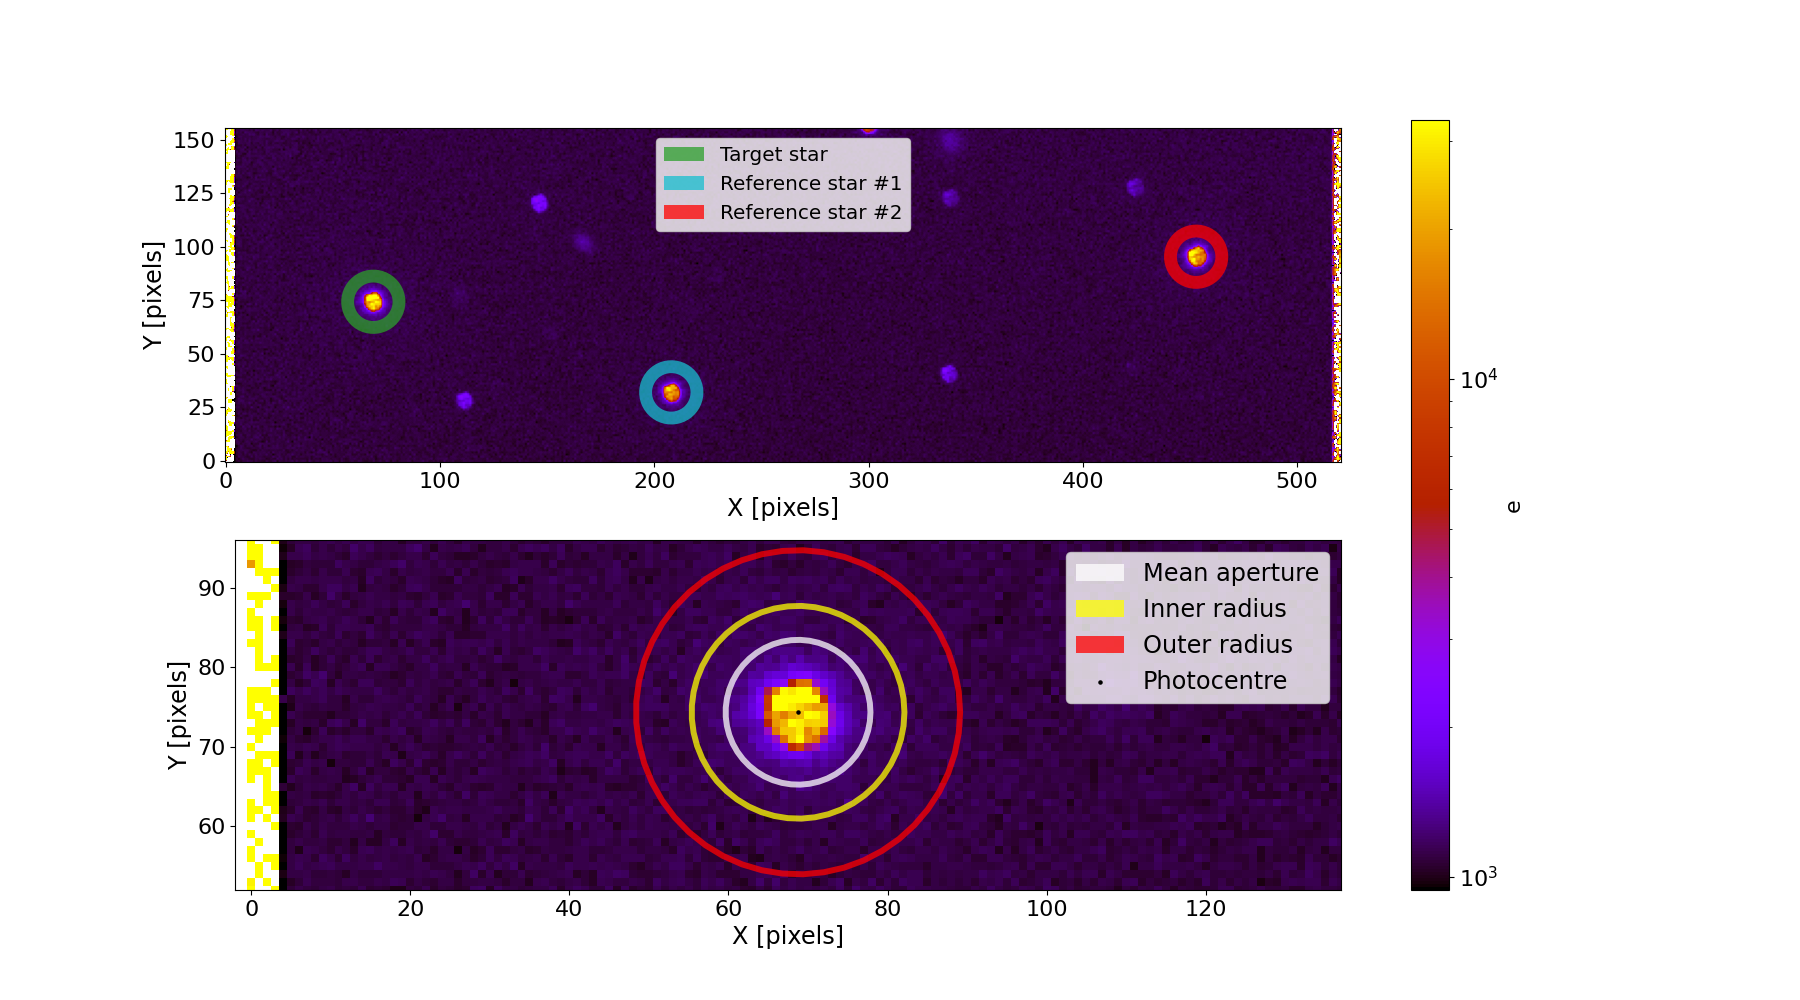

In [14]:
fig, ax = plt.subplots(2, 1, figsize=(18, 10))
ax[0].tick_params(axis='both', labelsize=16)

ax[1].tick_params(axis='both', labelsize=16)

im = ax[0].imshow(target.science_corrected[:, :, 0], origin='lower', norm=colors.LogNorm(vmin=vmin, vmax=vmax), 
                cmap=plt.colormaps['gnuplot'])
make_big_circle_around_star(target.x_refined[0], target.y_refined[0], color='tab:green', label='Target star')
make_big_circle_around_star(ref01.x_refined[0], ref01.y_refined[0], color='tab:cyan', label='Reference star #1')
make_big_circle_around_star(ref02.x_refined[0], ref02.y_refined[0], color='r', label='Reference star #2')
ax[0].legend(loc='upper center', fontsize='x-large')

cbar = fig.colorbar(im, ax=ax)
cbar.set_label(label='e', size=16)

ax[0].set_xlabel('X [pixels]', fontsize='xx-large')
ax[0].set_ylabel('Y [pixels]', fontsize='xx-large')

xmin = int(target.x_refined[0]-71)
xmax = int(target.x_refined[0]+69)
ymin = int(target.y_refined[0]-22)
ymax = int(target.y_refined[0]+22)

ax[1].imshow(target.science_corrected[:, :, 0],
              origin='lower', norm=colors.LogNorm(vmin=vmin, vmax=vmax), 
                cmap=plt.colormaps['gnuplot'])
make_circle_around_star(target.x_refined[0], target.y_refined[0], np.mean(target.aperture), 'white', label='Mean aperture')
make_circle_around_star(target.x_refined[0], target.y_refined[0], 13, 'yellow', label='Inner radius')
make_circle_around_star(target.x_refined[0], target.y_refined[0], 20, 'r', label='Outer radius')
ax[1].scatter(target.x_refined[0], target.y_refined[0], s=5, color='k', label='Photocentre')
ax[1].set_xlim(xmin, xmax)
ax[1].set_ylim(ymin, ymax)

ax[1].set_xlabel('X [pixels]', fontsize='xx-large')
ax[1].set_ylabel('Y [pixels]', fontsize='xx-large')
ax[1].legend(loc='best', fontsize='xx-large')


cbar.ax.tick_params(labelsize=16)

plt.savefig('./Plots/stars2_ok.png', dpi=1000)

plt.show()


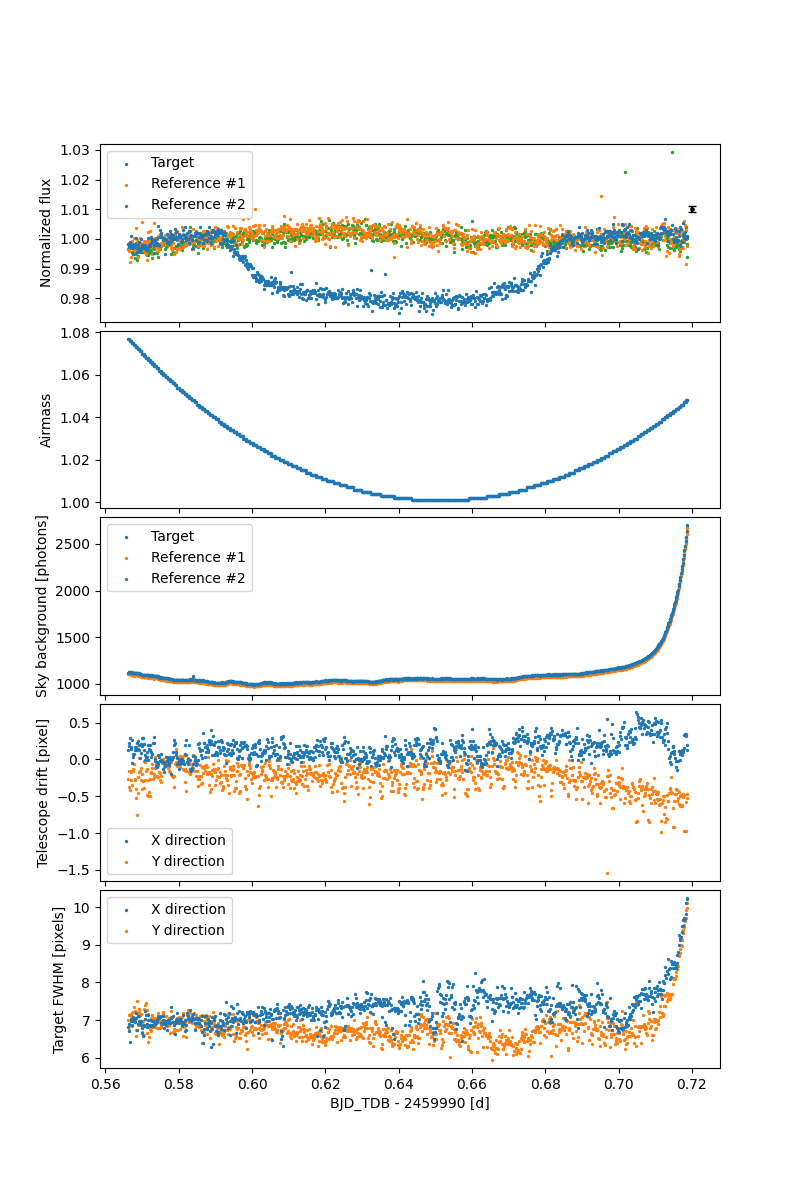

In [20]:
time_offset = 2459990.00

#now we want to normalize the flux in order to get a better comparison between the stars
normalization_index = 100

fig, ax = plt.subplots(5, 1, sharex=True, figsize=(8, 12))
fig.subplots_adjust(hspace=0.05)

ax[0].scatter(target.bjd - time_offset, target.photometry / target.photometry[normalization_index], 
              s=2, zorder=3, c='C0', label='Target') #zorder indicates which plot is on the others
ax[0].scatter(ref01.bjd - time_offset, ref01.photometry / ref01.photometry[normalization_index], 
              s=2, zorder=2, c='C1', label='Reference #1')
ax[0].scatter(ref02.bjd - time_offset, ref02.photometry / ref02.photometry[normalization_index], 
              s=2, zorder=1, c='C2', label='Reference #2')
ax[0].scatter(0.64, 1.02, s=5, c='k')
ax[0].errorbar(0.64, 1.02, yerr=np.mean(target.photometry_error / target.photometry[normalization_index]), fmt='', capsize=3, ecolor='k')

ax[0].set_ylabel('Normalized flux')
ax[0].legend()

ax[1].scatter(target.bjd - time_offset, target.airmass, s=2, c='C0', label='Airmass')
ax[1].set_ylabel('Airmass')

ax[2].scatter(target.bjd - time_offset, target.sky_background, s=2, zorder=3, c='C0', label='Target')
ax[2].scatter(ref01.bjd - time_offset, ref01.sky_background, s=2, zorder=2, c='C1', label='Reference #1')
ax[2].scatter(ref02.bjd - time_offset, ref02.sky_background, s=2, zorder=1, c='C2', label='Reference #2')
ax[2].set_ylabel('Sky background [photons]')
ax[2].legend()

ax[3].scatter(target.bjd - time_offset, target.x_refined - target.x_refined[normalization_index], s=2, zorder=3, c='C0', label='X direction')
ax[3].scatter(target.bjd - time_offset, target.y_refined - target.y_refined[normalization_index], s=2, zorder=2, c='C1', label='Y direction')
ax[3].legend()
ax[3].set_ylabel('Telescope drift [pixel]')

ax[4].scatter(target.bjd-time_offset, target.FWHM_X, s=2, zorder=3, c='C0', label='X direction')
ax[4].scatter(target.bjd-time_offset, target.FWHM_Y, s=2, zorder=2, c='C1', label='Y direction')
ax[4].set_ylabel('Target FWHM [pixels]')
ax[4].set_xlabel('BJD_TDB - 2459990 [d]')
ax[4].legend()

plt.savefig('./Plots/night_condition.png', dpi=1000)

plt.show()


#put this plot in the report

In [16]:
target_dictionary = {
    'time': target.bjd,
    'flux': target.photometry,
    'flux_err': target.photometry_error,
    'x_ref': target.x_refined,
    'y_ref': target.y_refined,
    'aperture': target.aperture,
    'background': target.sky_background,
    'background_error': target.sky_background_error,
    'inner_radius': target.inner_radius,
    'outer_radius': target.outer_radius,
    'FWHM_x': target.FWHM_X,
    'FWHM_y': target.FWHM_Y
}

ref01_dictionary = {
    'time': ref01.bjd,
    'flux': ref01.photometry,
    'flux_err': ref01.photometry_error,
    'x_ref': ref01.x_refined,
    'y_ref': ref01.y_refined,
    'aperture': ref01.aperture,
    'background': ref01.sky_background,
    'background_error': ref01.sky_background_error,
    'inner_radius': ref01.inner_radius,
    'outer_radius': ref01.outer_radius,
    'FWHM_x': ref01.FWHM_X,
    'FWHM_y': ref01.FWHM_Y
}

ref02_dictionary = {
    'time': ref02.bjd,
    'flux': ref02.photometry,
    'flux_err': ref02.photometry_error,
    'x_ref': ref02.x_refined,
    'y_ref': ref02.y_refined,
    'aperture': ref02.aperture,
    'background': ref02.sky_background,
    'background_error': ref02.sky_background_error,
    'inner_radius': ref02.inner_radius,
    'outer_radius': ref02.outer_radius,
    'FWHM_x': ref02.FWHM_X,
    'FWHM_y': ref02.FWHM_Y
}

pickle.dump(target_dictionary, open('../Results/TASTE/target_dictionary.p', 'wb'))
pickle.dump(ref01_dictionary, open('../Results/TASTE/ref01_dictionary.p', 'wb'))
pickle.dump(ref02_dictionary, open('../Results/TASTE/ref02_dictionary.p', 'wb'))

In [17]:
pickle.dump(normalized_diff_allref_photometry, open('../Results/TASTE/normalized_diff_allref.p', 'wb'))
pickle.dump(normalized_diff_ref01_photometry, open('../Results/TASTE/normalized_diff_ref01.p', 'wb'))
pickle.dump(normalized_diff_ref02_photometry, open('../Results/TASTE/normalized_diff_ref02.p', 'wb'))

pickle.dump(differential_ref01, open('../Results/TASTE/differential_ref01.p', 'wb'))
pickle.dump(differential_ref02, open('../Results/TASTE/differential_ref02.p', 'wb'))
pickle.dump(differential_allref, open('../Results/TASTE/differential_allref.p', 'wb'))